In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pyuvdata
import os
from datetime import datetime

In [6]:
filenames = os.listdir("/lustre/21cmpipe/solar_panel_test/")
filenames = np.sort(np.array([name for name in filenames if name.endswith(".uvfits")]))

In [7]:
print(filenames[0])

20250819_040000_autos_selected.uvfits


The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

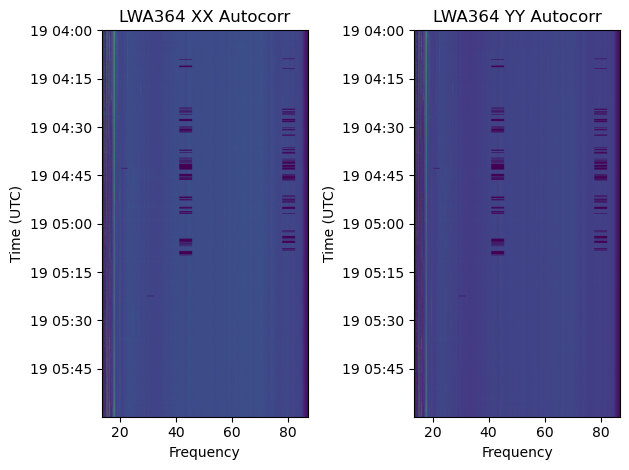

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

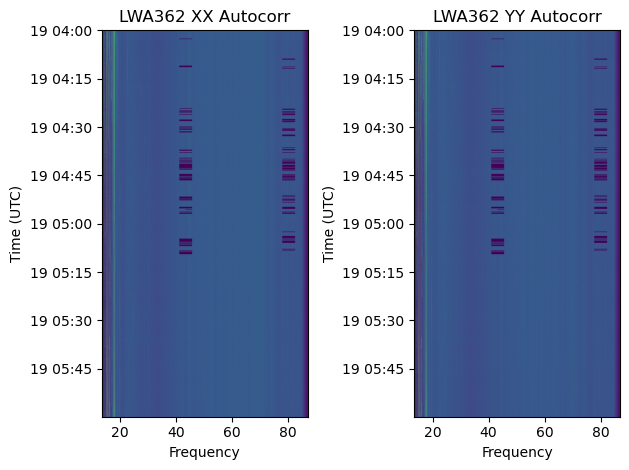

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

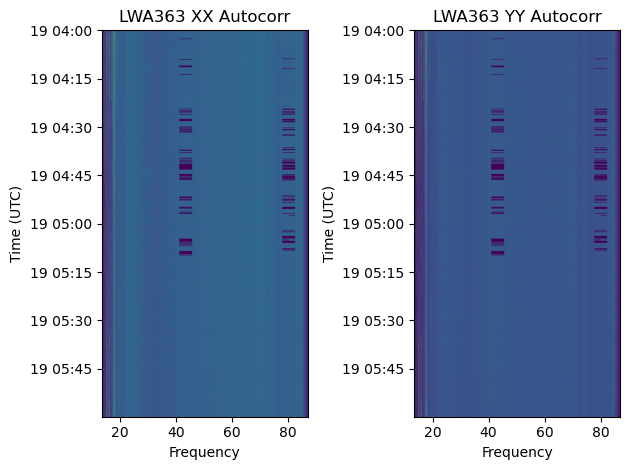

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

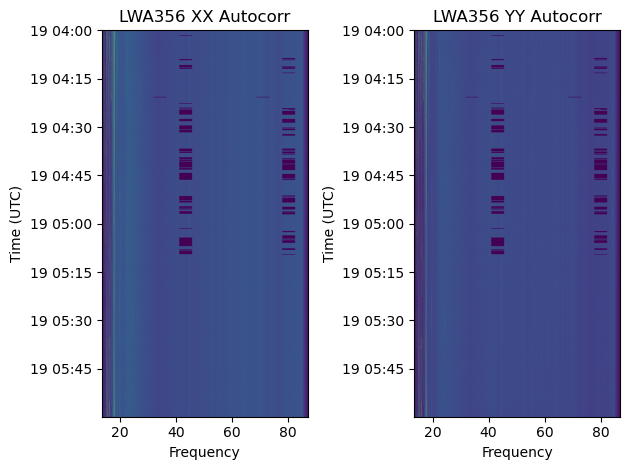

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

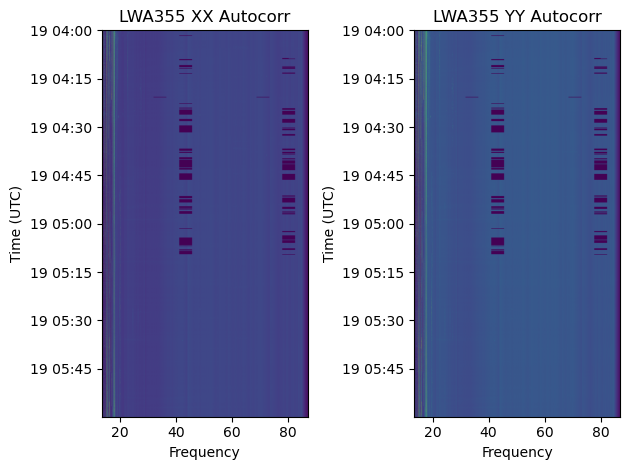

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

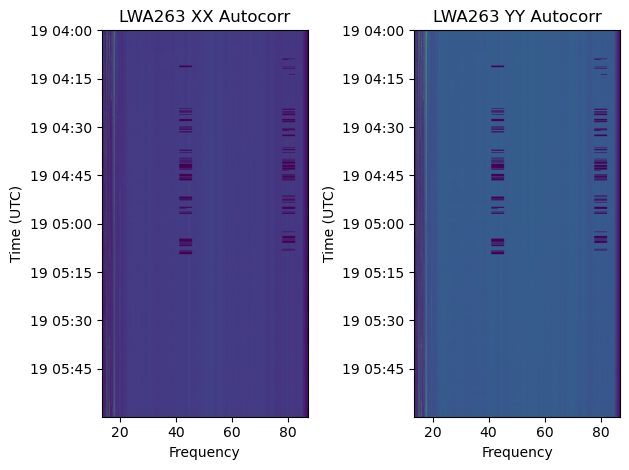

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

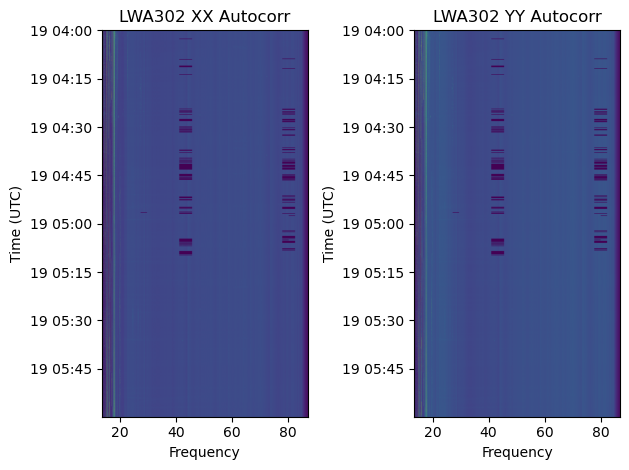

In [10]:
antenna_names=[
    "LWA364",
    "LWA362",
    "LWA363",
    "LWA356",
    "LWA355",
    "LWA263",
    "LWA302",
]

for antname in antenna_names:
    first_file = True
    times = []
    for use_filename in filenames:
        new_uv = pyuvdata.UVData()
        new_uv.read(
            f"/lustre/21cmpipe/solar_panel_test/{use_filename}"
        )
        new_uv.select(antenna_names=antname, polarizations=[-5, -6])
        times.append(
            datetime(int(use_filename[:4]), int(use_filename[4:6]), int(use_filename[6:8]), int(use_filename[9:11]), int(use_filename[11:13]), int(use_filename[13:15]))
        )
        if first_file:
            uv = new_uv
            first_file = False
        else:
            uv += new_uv

    fig, ax = plt.subplots(ncols=2, nrows=1)
    for pol in [0, 1]:
        im = ax[pol].imshow(
            np.abs(uv.data_array[:,:,pol]),
            extent=[np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6, np.max(times), np.min(times)],
            aspect="auto",
            vmin=0,
            vmax=100,
            origin="upper",
            interpolation=None,
        )
        ax[pol].set_xlabel("Frequency")
        ax[pol].set_ylabel("Time (UTC)")
        
    ax[0].set_title(f"{antname} XX Autocorr")
    ax[1].set_title(f"{antname} YY Autocorr")
    #fig.colorbar(im)
    plt.tight_layout()
    plt.savefig(f"/lustre/rbyrne/autocorr_plot_{antname}.png", dpi=600)
    plt.show()